In [1]:
import pandas as pd
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor
import matplotlib.pyplot as plt
import plotly.graph_objects as go


/Users/akramchakrouni/miniconda3/envs/eosl/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = pd.read_parquet("/Users/akramchakrouni/Projects/time-series-forecasting-cluserting/data/chronos/TSLA.parquet")
data.head(3)


Close      Open      High       Low    Volume
item_id timestamp                                                            
TSLA    2022-03-21 09:30:00  0.528421  0.537382  0.543907  0.536422  0.095657
        2022-03-21 10:30:00  0.545825  0.530966  0.534825  0.536511  0.050242
        2022-03-21 11:30:00  0.542490  0.548385  0.535122  0.547078  0.026185

In [50]:
# last50 = df_reset.tail(20)

# fig = go.Figure()
# fig.add_trace(go.Scatter(
#     x=last50['timestamp'],
#     y=last50['Close'],
#     mode='lines',
# ))
# fig.update_layout(
#     xaxis_title='Timestamp',
#     yaxis_title='Close Price',
#     template='plotly_white'
# )
# fig.show()

In [94]:
ts_df = TimeSeriesDataFrame.from_data_frame(data, id_column="item_id", timestamp_column="timestamp")
ts_df

Close      Open      High       Low    Volume
item_id timestamp                                                            
TSLA    2022-03-21 09:30:00  0.528421  0.537382  0.543907  0.536422  0.095657
        2022-03-21 10:30:00  0.545825  0.530966  0.534825  0.536511  0.050242
        2022-03-21 11:30:00  0.542490  0.548385  0.535122  0.547078  0.026185
        2022-03-21 12:30:00  0.529418  0.545012  0.529791  0.534282  0.034946
        2022-03-21 13:30:00  0.541454  0.531789  0.529172  0.538198  0.023250
...                               ...       ...       ...       ...       ...
        2025-02-20 11:30:00  0.662698  0.665397  0.650347  0.668114  0.044964
        2025-02-20 12:30:00  0.661508  0.664567  0.651341  0.665663  0.035072
        2025-02-20 13:30:00  0.660242  0.663272  0.646944  0.667477  0.025724
        2025-02-20 14:30:00  0.662164  0.661918  0.649771  0.663585  0.041519
        2025-02-20 15:30:00  0.663979  0.663844  0.650163  0.668514  0.029631

[5107 rows x 5 columns]

In [95]:
prediction_length = 500
train_data, test_data = ts_df.train_test_split(prediction_length)

In [96]:
train_data

Close      Open      High       Low    Volume
item_id timestamp                                                            
TSLA    2022-03-21 09:30:00  0.528421  0.537382  0.543907  0.536422  0.095657
        2022-03-21 10:30:00  0.545825  0.530966  0.534825  0.536511  0.050242
        2022-03-21 11:30:00  0.542490  0.548385  0.535122  0.547078  0.026185
        2022-03-21 12:30:00  0.529418  0.545012  0.529791  0.534282  0.034946
        2022-03-21 13:30:00  0.541454  0.531789  0.529172  0.538198  0.023250
...                               ...       ...       ...       ...       ...
        2024-11-01 14:30:00  0.383074  0.383817  0.374477  0.387991  0.047772
        2024-11-01 15:30:00  0.382247  0.386299  0.373979  0.389829  0.042920
        2024-11-04 09:30:00  0.375359  0.374072  0.367593  0.365160  0.261220
        2024-11-04 10:30:00  0.374691  0.378745  0.372775  0.383169  0.113973
        2024-11-04 11:30:00  0.370868  0.378047  0.365866  0.377228  0.104026

[4607 rows x 5 columns]

In [97]:
test_data

Close      Open      High       Low    Volume
item_id timestamp                                                            
TSLA    2022-03-21 09:30:00  0.528421  0.537382  0.543907  0.536422  0.095657
        2022-03-21 10:30:00  0.545825  0.530966  0.534825  0.536511  0.050242
        2022-03-21 11:30:00  0.542490  0.548385  0.535122  0.547078  0.026185
        2022-03-21 12:30:00  0.529418  0.545012  0.529791  0.534282  0.034946
        2022-03-21 13:30:00  0.541454  0.531789  0.529172  0.538198  0.023250
...                               ...       ...       ...       ...       ...
        2025-02-20 11:30:00  0.662698  0.665397  0.650347  0.668114  0.044964
        2025-02-20 12:30:00  0.661508  0.664567  0.651341  0.665663  0.035072
        2025-02-20 13:30:00  0.660242  0.663272  0.646944  0.667477  0.025724
        2025-02-20 14:30:00  0.662164  0.661918  0.649771  0.663585  0.041519
        2025-02-20 15:30:00  0.663979  0.663844  0.650163  0.668514  0.029631

[5107 rows x 5 columns]

In [98]:
predictor = TimeSeriesPredictor(prediction_length=prediction_length, target="Close", freq="1h").fit(
    train_data, presets="bolt_small",
)

Frequency '1h' stored as 'h'
Beginning AutoGluon training...
AutoGluon will save models to '/Users/akramchakrouni/Projects/time-series-forecasting-cluserting/notebooks/model_training/AutogluonModels/ag-20250221_161109'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 24.3.0: Thu Jan  2 20:24:24 PST 2025; root:xnu-11215.81.4~3/RELEASE_ARM64_T6030
CPU Count:          11
GPU Count:          0
Memory Avail:       7.80 GB / 18.00 GB (43.3%)
Disk Space Avail:   393.93 GB / 460.43 GB (85.6%)
Setting presets to: bolt_small

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'h',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 500,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_eve

data with frequency 'None' has been resampled to frequency 'h'.
Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_small]
data with frequency 'None' has been resampled to frequency 'h'.


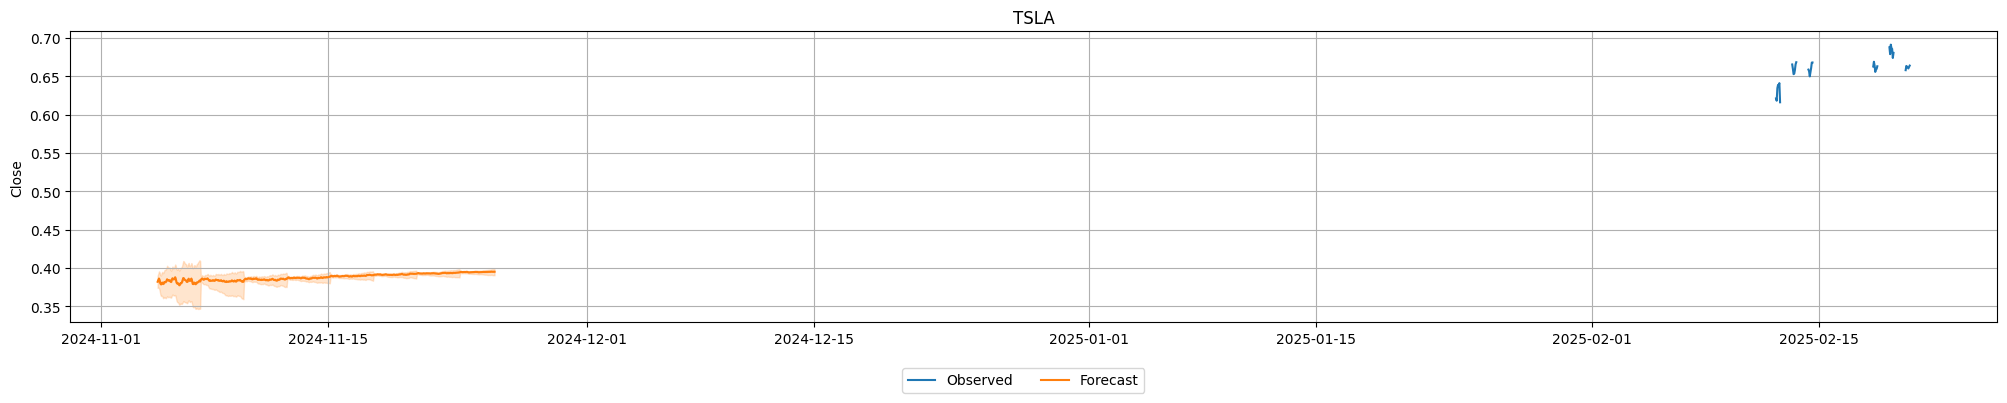

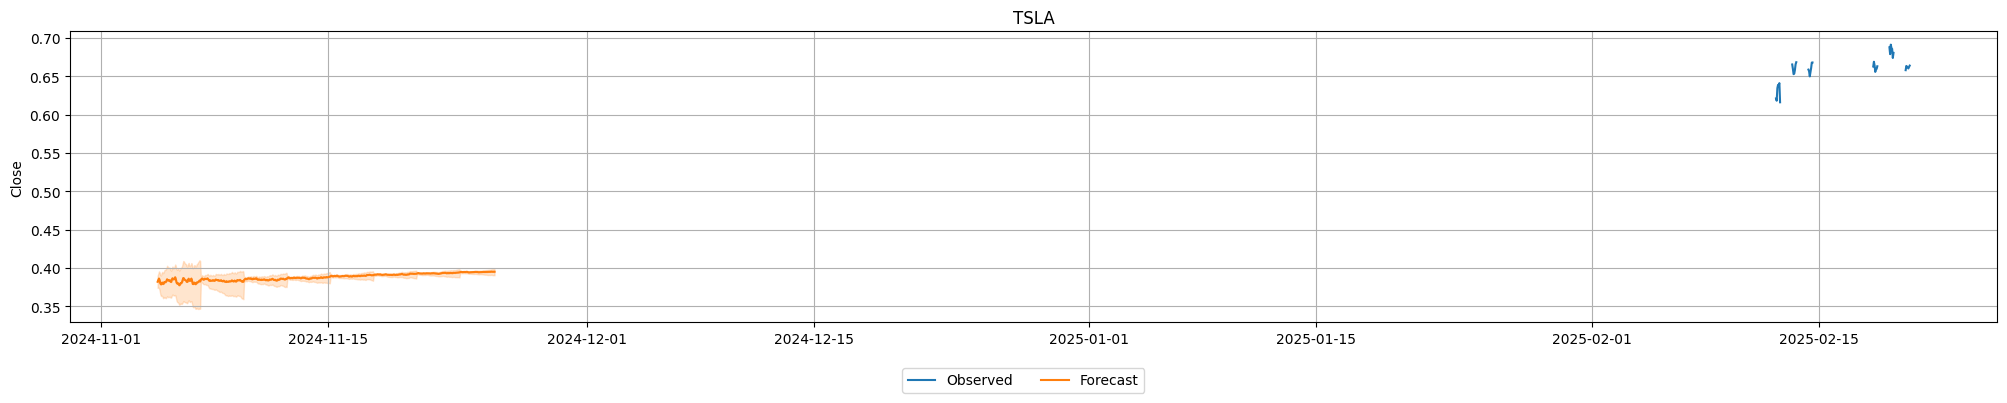

In [104]:
predictions = predictor.predict(train_data)
predictor.plot(
    data=data,
    predictions=predictions,
    item_ids=data.index.get_level_values("item_id").unique()[:2],
    max_history_length=200,
)




In [77]:
predictor = TimeSeriesPredictor(
    freq="1h",
    prediction_length=48,
    path="/Users/akramchakrouni/Projects/time-series-forecasting-cluserting/models",
    target="Close",
    eval_metric="MASE",
)

predictor.fit(
    train_data,
    presets="medium_quality",
    time_limit=600,
)

Frequency '1h' stored as 'h'
Beginning AutoGluon training... Time limit = 600s
AutoGluon will save models to '/Users/akramchakrouni/Projects/time-series-forecasting-cluserting/models'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 24.3.0: Thu Jan  2 20:24:24 PST 2025; root:xnu-11215.81.4~3/RELEASE_ARM64_T6030
CPU Count:          11
GPU Count:          0
Memory Avail:       7.68 GB / 18.00 GB (42.7%)
Disk Space Avail:   393.94 GB / 460.43 GB (85.6%)
Setting presets to: medium_quality

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': MASE,
 'freq': 'h',
 'hyperparameters': 'light',
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 48,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': 

KeyboardInterrupt: 

In [7]:
prediction_length = 48
data = train_data.copy()
train_data, test_data = train_data.train_test_split(prediction_length)

In [10]:
train_data

Close      Open      High       Low    Volume
item_id timestamp                                                            
TSLA    2022-03-21 09:30:00  0.528421  0.537382  0.543907  0.536422  0.095657
        2022-03-21 10:30:00  0.545825  0.530966  0.534825  0.536511  0.050242
        2022-03-21 11:30:00  0.542490  0.548385  0.535122  0.547078  0.026185
        2022-03-21 12:30:00  0.529418  0.545012  0.529791  0.534282  0.034946
        2022-03-21 13:30:00  0.541454  0.531789  0.529172  0.538198  0.023250
...                               ...       ...       ...       ...       ...
        2025-02-10 12:30:00  0.678850  0.676628  0.667229  0.681434  0.061480
        2025-02-10 13:30:00  0.672736  0.680584  0.663564  0.678531  0.060785
        2025-02-10 14:30:00  0.665608  0.674451  0.657623  0.668914  0.087616
        2025-02-10 15:30:00  0.653995  0.667388  0.650478  0.662546  0.087859
        2025-02-11 09:30:00  0.636242  0.643080  0.635742  0.639342  0.262162

[5059 rows x 5 columns]

In [19]:
predictor = TimeSeriesPredictor(prediction_length=2000,  eval_metric="MASE", target="Close", freq='1h').fit(
    train_data=train_data,
    hyperparameters={
        "Chronos": [
            {"model_path": "bolt_base", "ag_args": {"name_suffix": "ZeroShot"}}
            # {"model_path": "bolt_small", "fine_tune": True, "ag_args": {"name_suffix": "FineTuned"}},
        ]
    },
    time_limit=60,  # time limit in seconds
    enable_ensemble=False,
)

Frequency '1h' stored as 'h'
Beginning AutoGluon training... Time limit = 60s
AutoGluon will save models to '/Users/akramchakrouni/Projects/time-series-forecasting-cluserting/notebooks/model_training/AutogluonModels/ag-20250221_154031'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 24.3.0: Thu Jan  2 20:24:24 PST 2025; root:xnu-11215.81.4~3/RELEASE_ARM64_T6030
CPU Count:          11
GPU Count:          0
Memory Avail:       7.38 GB / 18.00 GB (41.0%)
Disk Space Avail:   393.94 GB / 460.43 GB (85.6%)

Fitting with arguments:
{'enable_ensemble': False,
 'eval_metric': MASE,
 'freq': 'h',
 'hyperparameters': {'Chronos': [{'ag_args': {'name_suffix': 'ZeroShot'},
                                  'model_path': 'bolt_base'}]},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 2000,
 'quantile_levels': [0.1, 0.2, 0.3,

In [20]:
prediction = predictor.predict(train_data)

data with frequency 'None' has been resampled to frequency 'h'.
Model not specified in predict, will default to the model with the best validation score: ChronosZeroShot[bolt_base]


In [21]:
prediction = prediction.reset_index()

In [22]:
test_data = test_data.reset_index()

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

# Add prediction trace
fig.add_trace(go.Scatter(
    x=prediction['timestamp'],
    y=prediction['mean'],
    mode='lines',
    name='Prediction'
))

# Add actual (test data) trace
fig.add_trace(go.Scatter(
    x=test_data['timestamp'],
    y=test_data['Close'],
    mode='lines',
    name='Actual'
))

fig.update_layout(
    title="Prediction vs. Actual",
    xaxis_title="Timestamp",
    yaxis_title="Close Price",
    template="plotly_white"
)

fig.show()


data with frequency 'None' has been resampled to frequency 'h'.
Model not specified in predict, will default to the model with the best validation score: ChronosZeroShot[bolt_base]
data with frequency 'None' has been resampled to frequency 'h'.


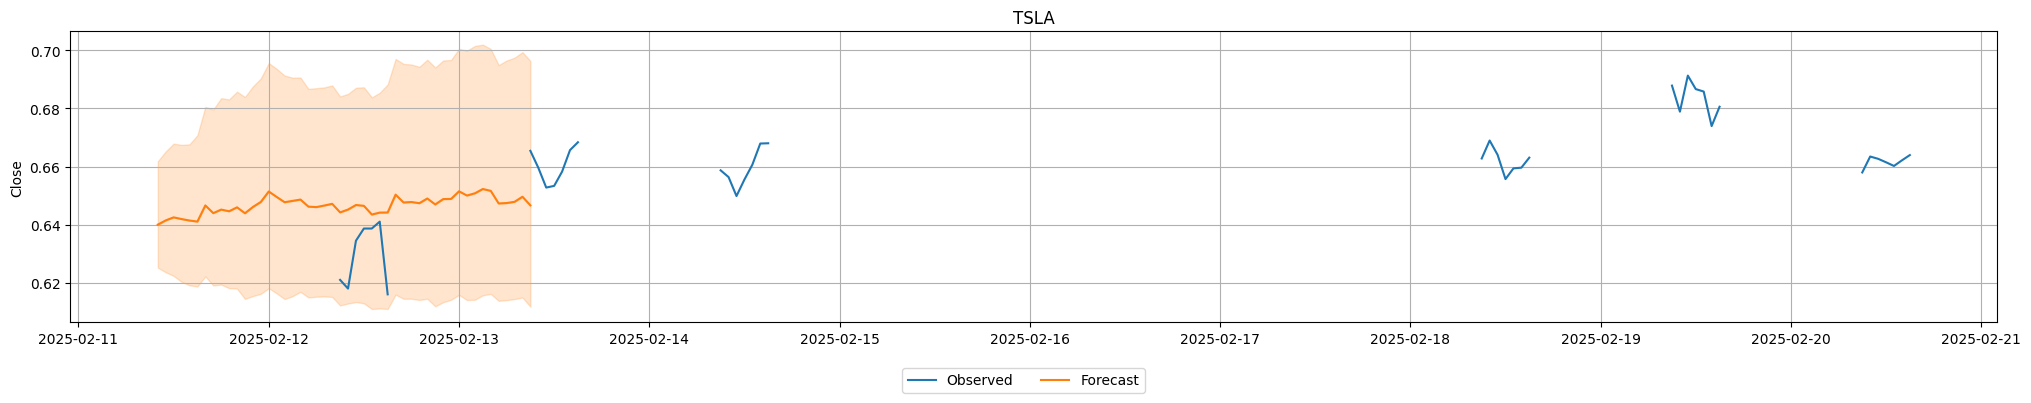

In [9]:
predictions = predictor.predict(train_data)
predictor.plot(
    data=data,
    predictions=predictions,
    item_ids=data.item_ids[:2],
    max_history_length=200,
)

In [10]:
predictor.leaderboard()

,model,score_val,pred_time_val,fit_time_marginal,fit_order
0,WeightedEnsemble,-0.604550,0.272074,0.108472,9
1,TemporalFusionTransformer,-0.636674,0.023673,135.816762,8
2,Naive,-0.658268,1.701663,0.019065,1
3,ETS,-0.660217,4.513780,0.020799,5
4,SeasonalNaive,-0.732196,0.713014,0.018112,2
5,Theta,-0.770978,6.156022,0.017408,6
6,RecursiveTabular,-0.862335,0.248401,1.771225,3
7,Chronos[bolt_small],-1.078217,32.712166,1.083742,7
8,DirectTabular,-2.404146,0.109413,2.310029,4
